In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [51]:
cdata =pd.read_csv("D:\oaisis\Car price\dataset\CarPrice_Assignment.csv")

In [52]:
cdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
cdata.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [54]:
cdata.shape

(205, 26)

In [55]:
cdata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [57]:
cdata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [58]:
cdata_dup=cdata.duplicated().any()
cdata_dup

False

In [59]:
for col in cdata.columns:
    print(col, ":",cdata[col].nunique())
    print(cdata[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

car_ID : 205
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64

********************

symboling : 6
 0    67
 1    54
 2    32
 3    27
-1    22
Name: symboling, dtype: int64

********************

CarName : 147
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: CarName, dtype: int64

********************

fueltype : 2
gas       185
diesel     20
Name: fueltype, dtype: int64

********************

aspiration : 2
std      168
turbo     37
Name: aspiration, dtype: int64

********************

doornumber : 2
four    115
two      90
Name: doornumber, dtype: int64

********************

carbody : 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

********************

drivewheel : 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

********************

enginelocation : 2
front    202
rear       3
Name

### Data preprocessing 

In [60]:
##Make all the strings in the same format
string_columns=list(cdata.dtypes[cdata.dtypes=='object'].index)
for col in string_columns:
    cdata[col]=cdata[col].str.lower().str.replace(' ','_')
    cdata[col]=cdata[col].str.lower().str.replace('-','_')

<AxesSubplot: xlabel='price', ylabel='Count'>

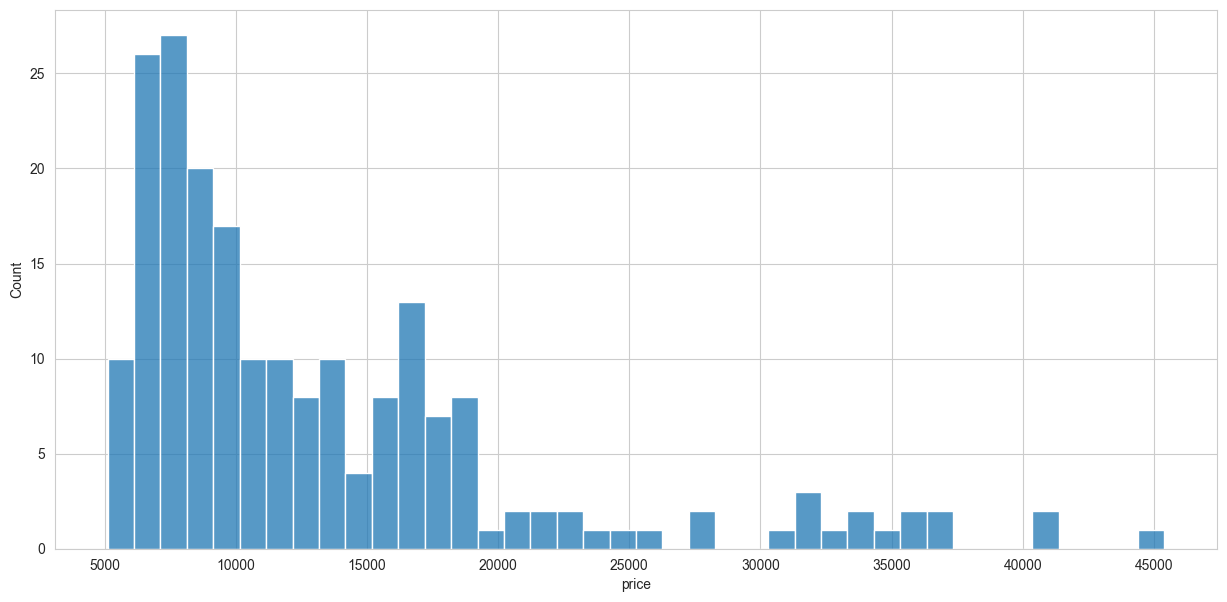

In [61]:
plt.figure(figsize=(15,7))
sns.histplot(cdata.price,bins=40)

In [62]:
cdata.price.skew()

1.7776781560914454

### Correlation matrix

In [63]:
correlations = cdata.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_8076\3029756746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = cdata.corr()


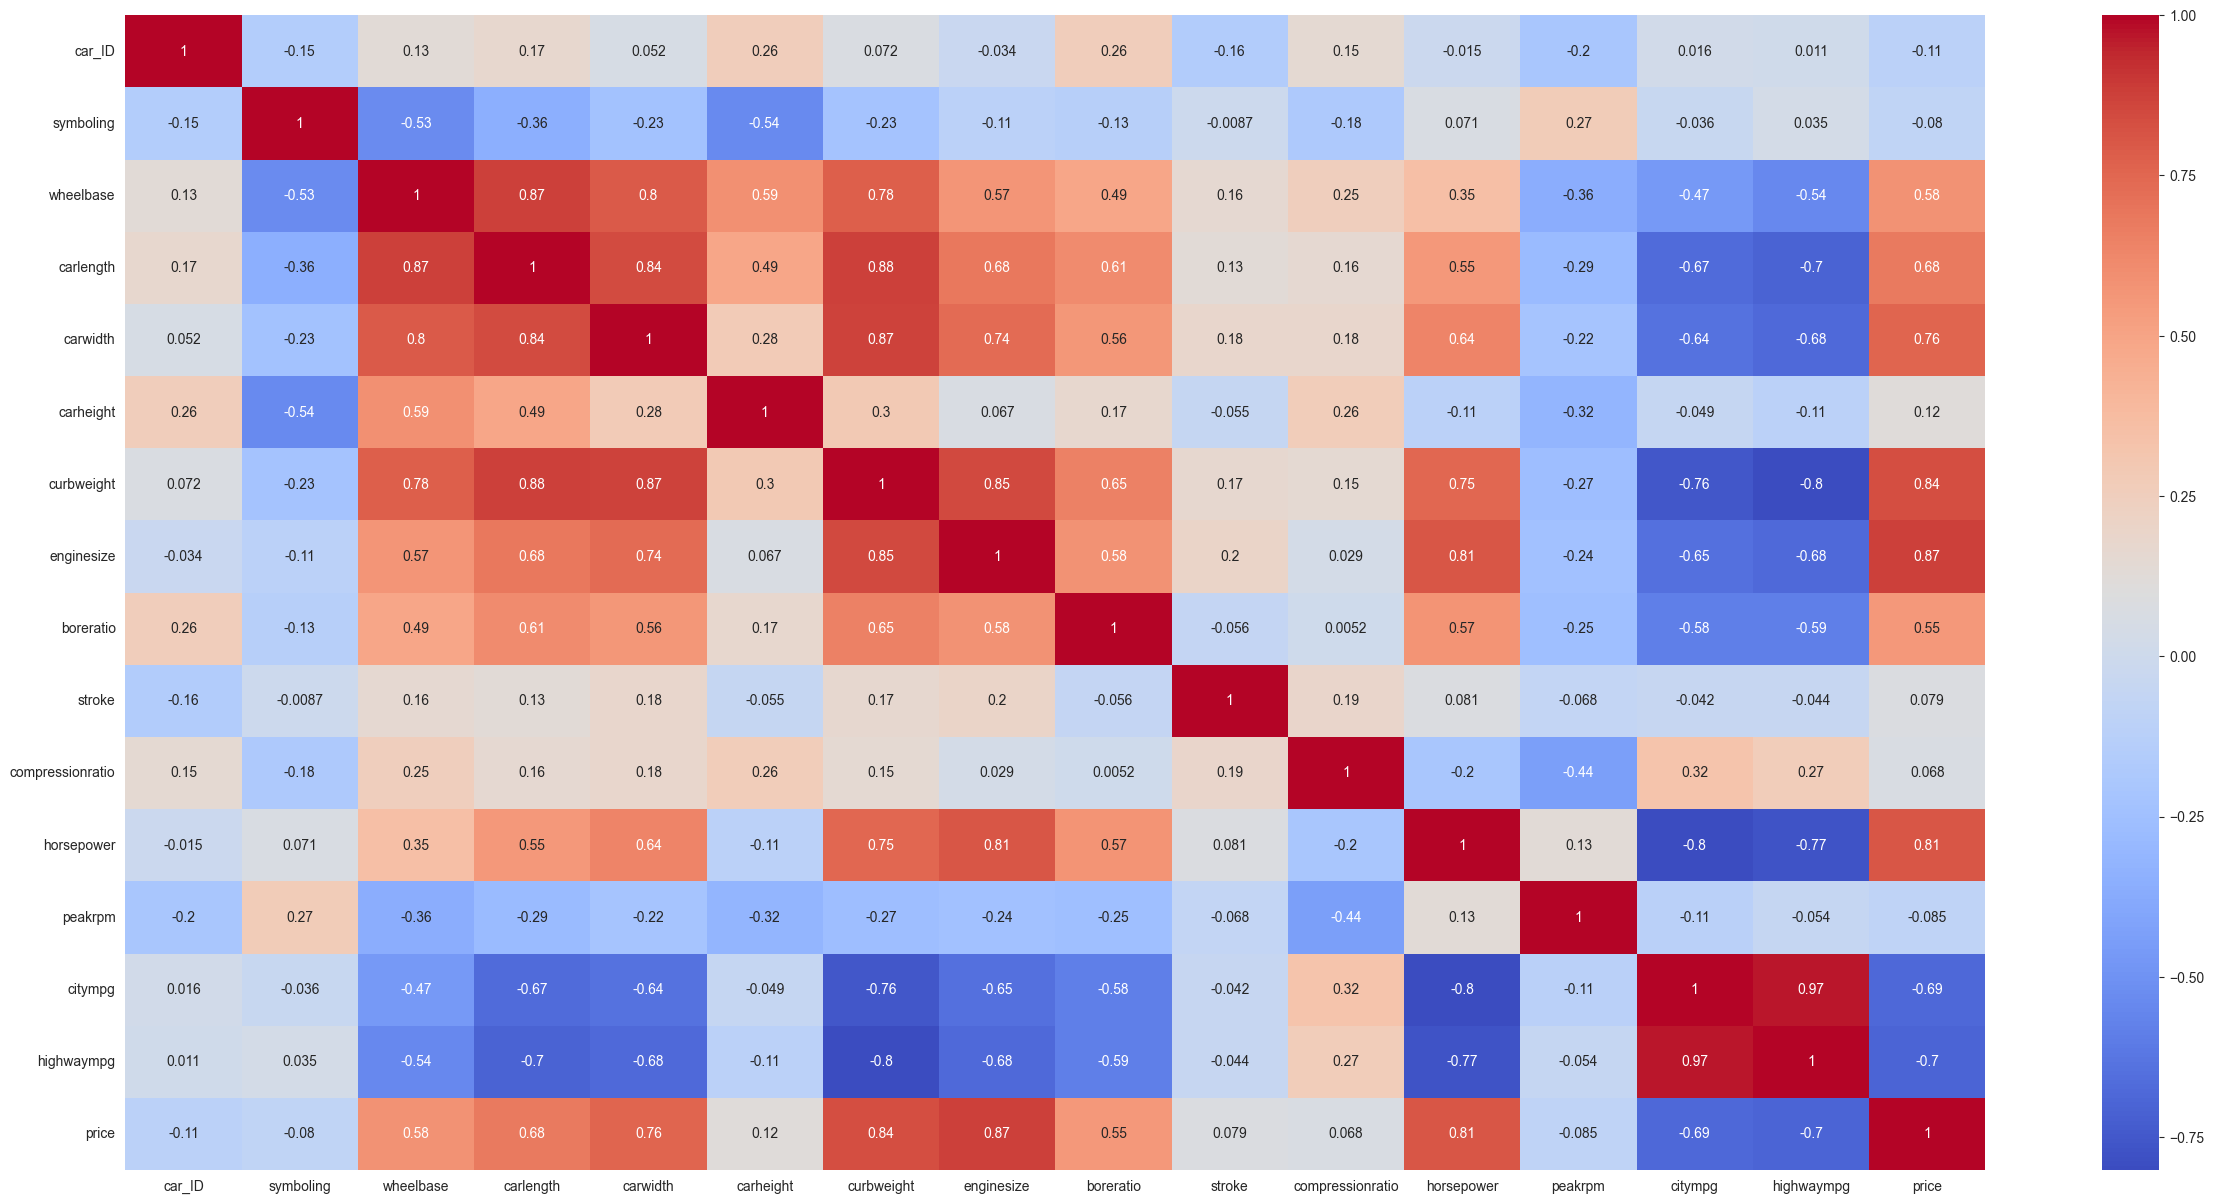

In [64]:
plt.figure(figsize=(30,15))

sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [65]:
cdata.CarName.value_counts()

toyota_corona           6
toyota_corolla          6
peugeot_504             6
subaru_dl               4
mitsubishi_mirage_g4    3
                       ..
mazda_glc_4             1
mazda_rx2_coupe         1
maxda_glc_deluxe        1
maxda_rx3               1
volvo_246               1
Name: CarName, Length: 147, dtype: int64

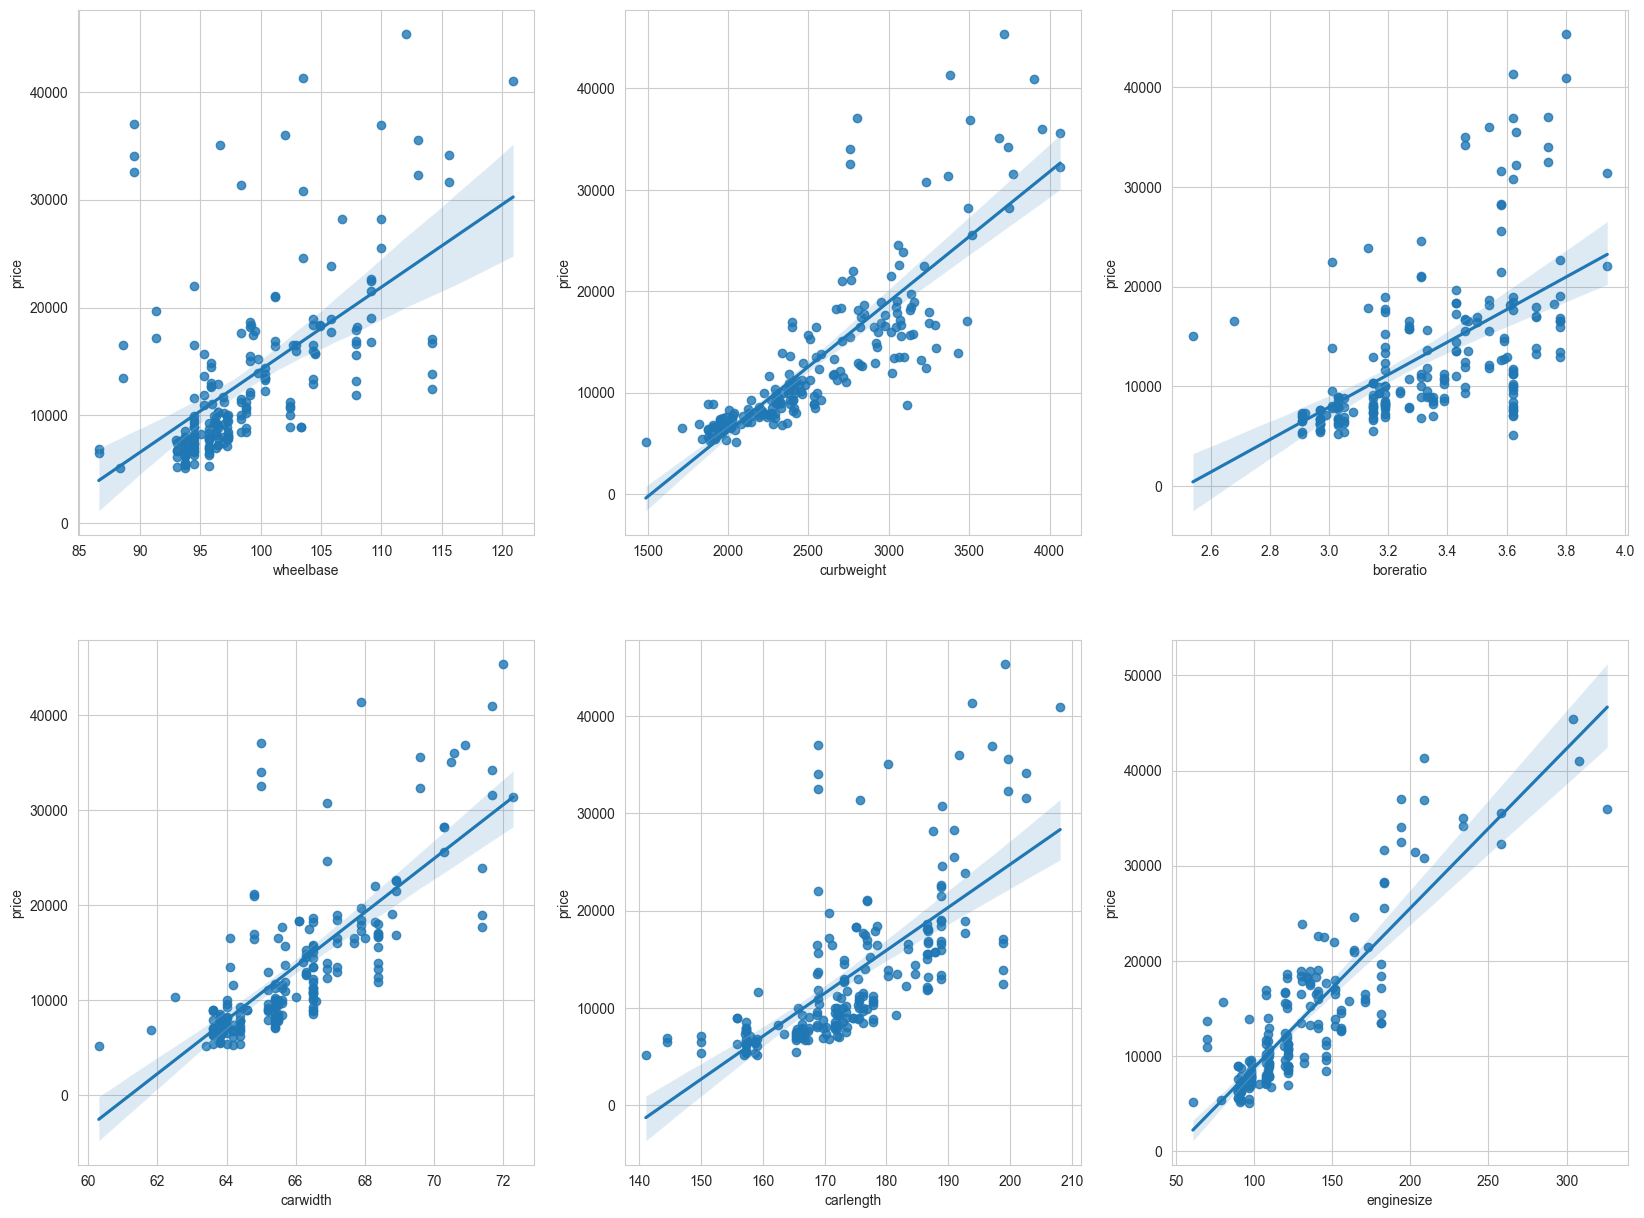

In [66]:
columns=['wheelbase','curbweight','boreratio','carwidth','carlength','enginesize']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'price', data = cdata)
plt.show()

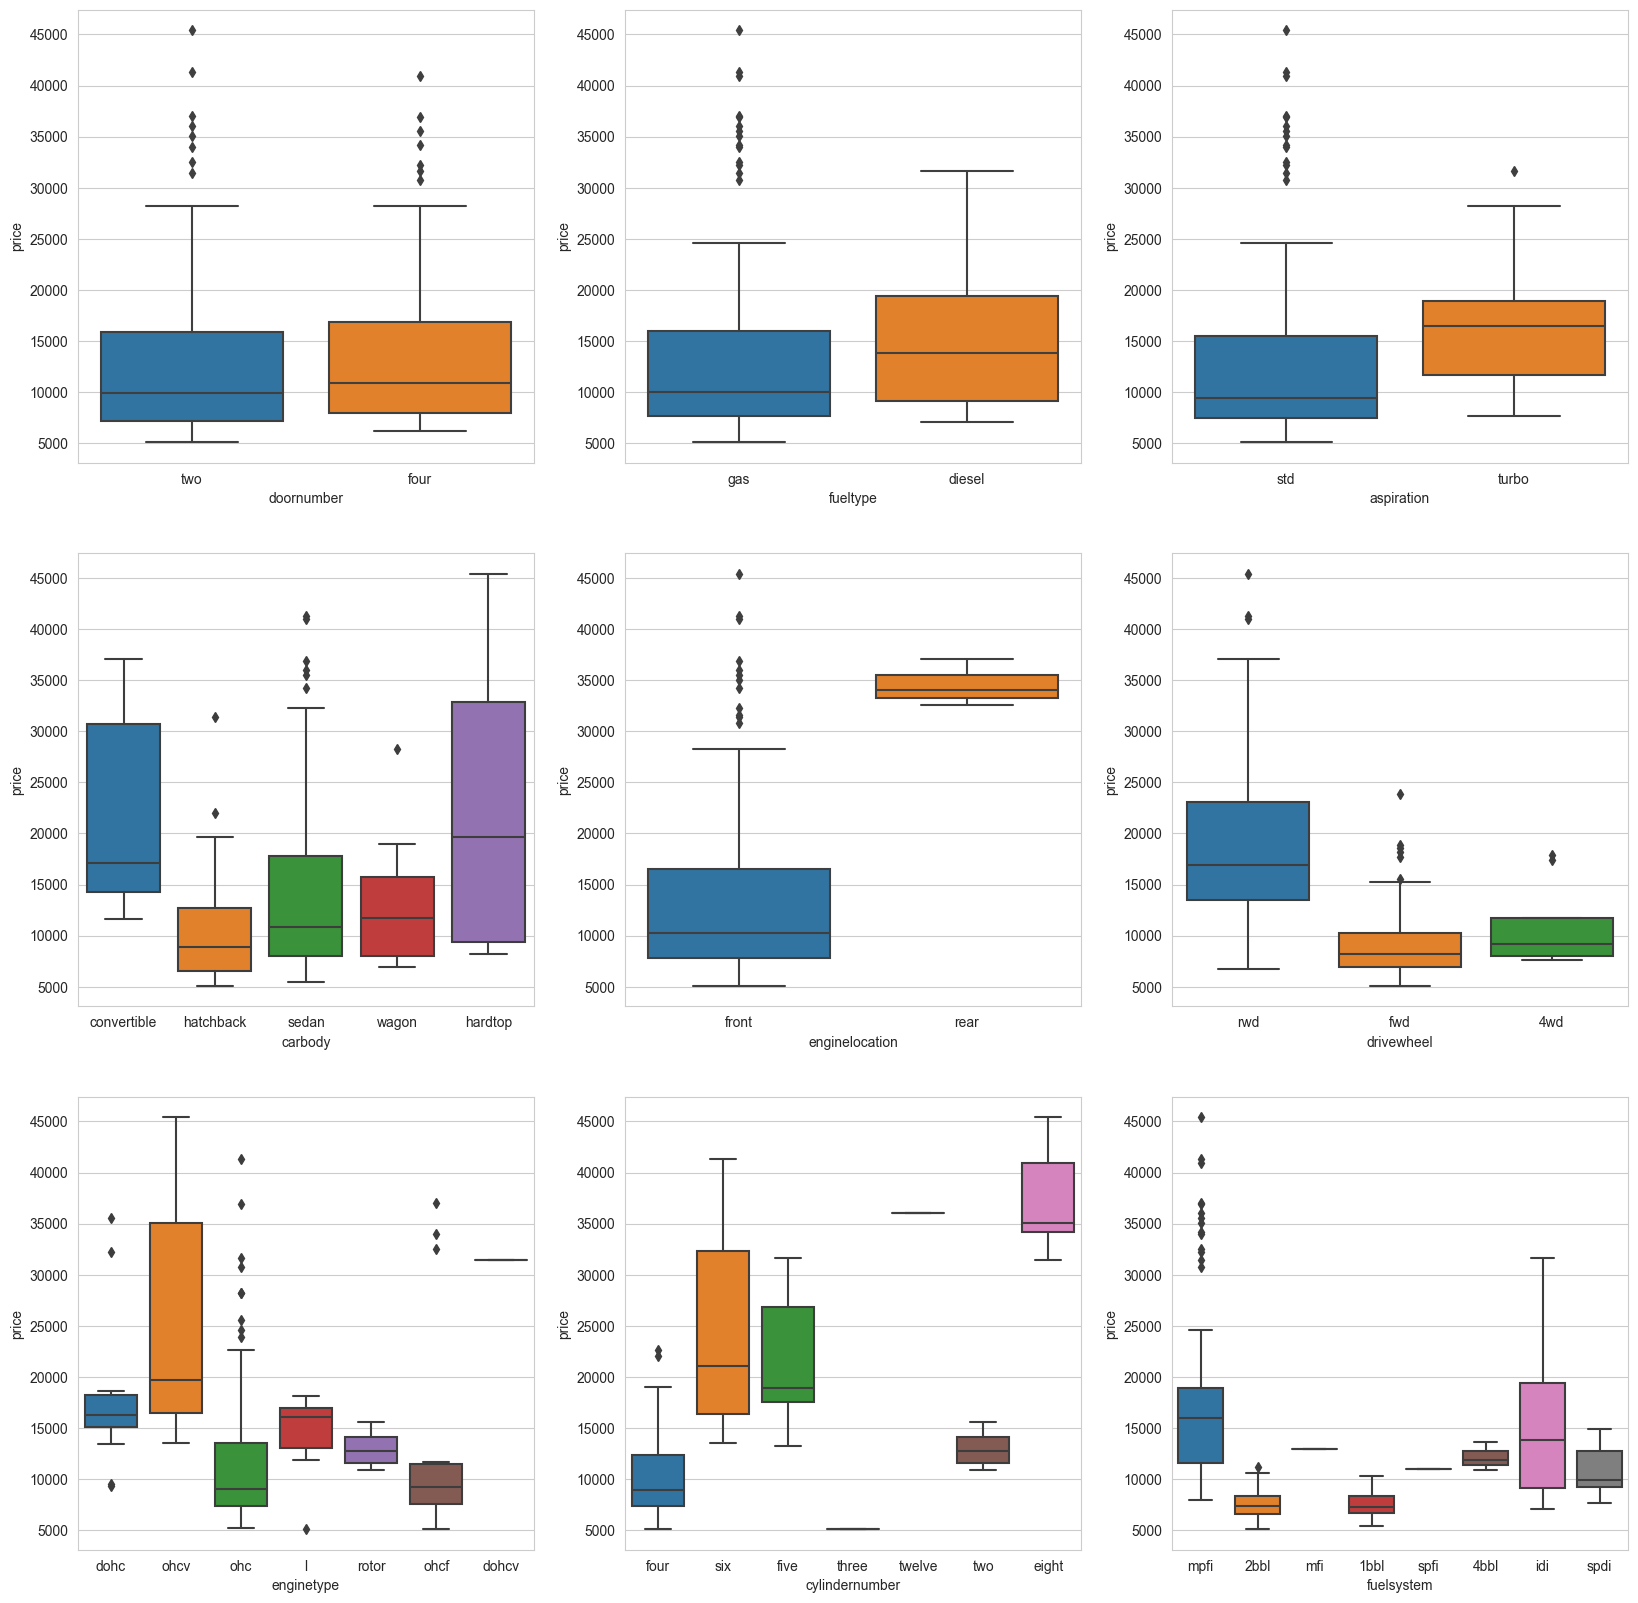

In [67]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = cdata)
plt.show()

### Convert important category data into numerical one

In [68]:
from sklearn.preprocessing import LabelEncoder

fueltype_le=LabelEncoder()
cdata['fueltype']= fueltype_le.fit_transform(cdata.fueltype)
enginelocation_le=LabelEncoder()
cdata['enginelocation']=enginelocation_le.fit_transform(cdata.enginelocation)
cylindernumber_le=LabelEncoder()
cdata['cylindernumber']=cylindernumber_le.fit_transform(cdata.cylindernumber)
enginetype_le=LabelEncoder()
cdata['enginetype']=enginetype_le.fit_transform(cdata.enginetype)
carbody_le=LabelEncoder()
cdata['carbody']=carbody_le.fit_transform(cdata.carbody)
aspiration_le=LabelEncoder()
cdata['aspiration']=aspiration_le.fit_transform(cdata.aspiration)

In [69]:
cdata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### model building

In [70]:
 # Splitting the dataset into the Training set and Test set
X=cdata.drop(["car_ID","CarName","doornumber","drivewheel","enginelocation","fuelsystem","symboling",
           'compressionratio','peakrpm','citympg','highwaympg','carheight','stroke'],axis=1)
y=cdata['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,shuffle=True,random_state = 8)

In [71]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [72]:
X_train

array([[ 0.30265996, -0.42640143, -0.78037595, ..., -1.03126731,
        -1.0233017 , -0.87167173],
       [ 0.30265996, -0.42640143,  0.44592911, ...,  0.58574174,
        -0.11339201,  0.32553301],
       [ 0.30265996, -0.42640143,  0.44592911, ...,  1.5918807 ,
         0.18991122,  0.37476408],
       ...,
       [ 0.30265996,  2.34520788, -0.78037595, ...,  0.334207  ,
         2.19637874,  0.71333149],
       [ 0.30265996,  2.34520788, -0.78037595, ...,  0.90914355,
         0.91317277,  0.09527395],
       [ 0.30265996, -0.42640143,  1.67223417, ...,  1.5918807 ,
         0.18991122, -0.03213369]])

In [73]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (143, 13)
X_test shape: (62, 13)
y_train shape: (143,)
y_test shape: (62,)


### Fitting model

In [74]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred= model.predict(X_test)
print(y_pred)

[21173.6499997   7129.84206055 14450.14861947 26644.36413773
 10742.1501991  11182.82912852  4891.19309912  8176.13974725
  7554.15291545 15608.50466251 18932.48287295 19656.45539985
 19005.50966697  7946.98670395  8932.84842319  8475.80141925
  7599.47989104  7220.49601175 13077.74852501 15148.93949326
  7838.70559558 14058.57391362  8795.60841374 30329.6990703
  6713.08570159  7095.84682885  7963.35477847 17988.17088135
 33724.18590945 11627.2853059  11879.101837   17774.12682992
  7737.97898314 12756.68244786  6583.40018808 10733.33662051
  8853.52621589 10723.26395927 15721.8221015  15337.80189158
 44778.9316245   9864.56958824  9384.22955518 11119.87499574
 20128.61139565 10180.59933476 10166.74942555 12333.63067562
 44592.58739149  8229.02121878  4698.55345283  6554.441287
  9782.72921563  8681.03189209 12881.33163075 21323.4808357
  8176.13974725 26449.20632613 24560.58234292  9840.64701778
  6315.21558246 10696.82322351]


In [78]:
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
65,18280.0,21173.650000
141,7126.0,7129.842061
194,12940.0,14450.148619
204,22625.0,26644.364138
188,9995.0,10742.150199


In [76]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 1398.8596117729985
 RMSE: 4839041.454967946


In [77]:
model.score(X_test,y_test)

0.8920431518162437

### final result

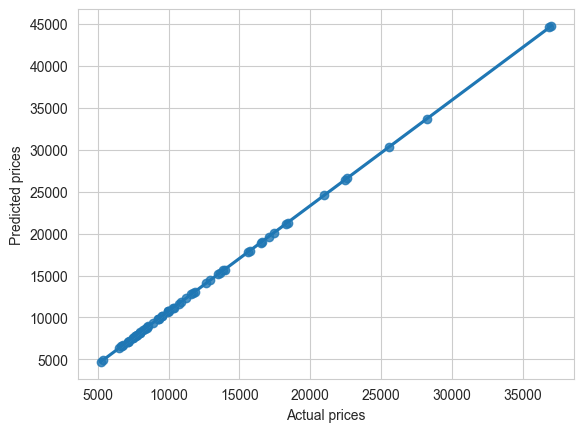

In [80]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()